## Machine Learning Models

- Logistic Regression
- Gradient Boosting
- Random Forest
- Decision tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
heart=pd.read_csv('cleaned-heart.csv')

## Preprocessing the data, splitting into train and test set

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


# Replace infinite values and handle NaNs
heart.replace([np.inf, -np.inf], np.nan, inplace=True)
heart.fillna(heart.mean(numeric_only=True), inplace=True)  # Numeric columns
for column in heart.select_dtypes(include='object').columns:
    heart[column].fillna(heart[column].mode()[0], inplace=True)  # Categorical columns

# Split the features and target
X = heart.drop('HaveCardiovascularDisease', axis=1)
y = heart['HaveCardiovascularDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])


## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the 'preprocessor' and data splits (X_train, X_test, y_train, y_test) are already defined

# Create the Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Predict and evaluate
logistic_predictions = logistic_pipeline.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Dynamically extract labels from y_test to avoid confusion matrix errors
labels = np.unique(y_test)
cm = confusion_matrix(y_test, logistic_predictions, labels=labels)

# Print the confusion matrix and calculate detailed metrics
print("Confusion Matrix:", cm)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"False Negative Rate (FNR): {fn / (fn + tp):.2f}")
print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
print(f"True Negative Rate (TNR): {tn / (tn + fp):.2f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     72277
         Yes       0.54      0.11      0.18      7368

    accuracy                           0.91     79645
   macro avg       0.73      0.55      0.57     79645
weighted avg       0.88      0.91      0.88     79645

Confusion Matrix: [[71601   676]
 [ 6559   809]]
TN=71601, FP=676, FN=6559, TP=809
False Negative Rate (FNR): 0.89
False Positive Rate (FPR): 0.01
True Positive Rate (TPR): 0.11
True Negative Rate (TNR): 0.99


This code creates a logistic regression model using a scikit-learn pipeline, trains it on a dataset, makes predictions on a test set, and evaluates the performance of the model. The code performs the following tasks:

1. **Creating a Pipeline**: It sets up a pipeline comprising a preprocessing step ('preprocessor') and a classification step ('classifier') using the Logistic Regression model with the SAGA solver and a high maximum iteration count (1000) to ensure convergence.

2. **Training the Model**: It trains the logistic regression model using the training dataset (X_train, y_train).

3. **Making Predictions**: After training, it uses the model to predict the outcomes on the test dataset (X_test).

4. **Evaluating the Model**: It evaluates the model's performance by printing a classification report that includes precision, recall, and F1-scores for each output class, providing an overall accuracy and other aggregated scores.

5. **Confusion Matrix**: The code dynamically extracts labels from the test set labels (y_test) to ensure that the confusion matrix properly accounts for all labels. It then computes and prints the confusion matrix displaying True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP).

6. **Calculating Performance Metrics**: It calculates and prints detailed performance metrics, including False Negative Rate (FNR), False Positive Rate (FPR), True Positive Rate (TPR), and True Negative Rate (TNR) based on the elements of the confusion matrix.

The purpose of this code is to demonstrate end-to-end model training, prediction, and evaluation phases in a supervised learning task, specifically for classification using logistic regression.

## Gradient Boosting

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the 'preprocessor' and data splits (X_train, X_test, y_train, y_test) are already defined

# Create the Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate
gb_predictions = gb_pipeline.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

# Confusion Matrix handling
labels = np.unique(y_test)
cm = confusion_matrix(y_test, gb_predictions, labels=labels)
print("Confusion Matrix:", cm)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"False Negative Rate (FNR): {fn / (fn + tp):.2f}")
print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
print(f"True Negative Rate (TNR): {tn / (tn + fp):.2f}")

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     72277
         Yes       0.54      0.11      0.18      7368

    accuracy                           0.91     79645
   macro avg       0.73      0.55      0.57     79645
weighted avg       0.88      0.91      0.88     79645

Confusion Matrix: [[71592   685]
 [ 6555   813]]
TN=71592, FP=685, FN=6555, TP=813
False Negative Rate (FNR): 0.89
False Positive Rate (FPR): 0.01
True Positive Rate (TPR): 0.11
True Negative Rate (TNR): 0.99


This code creates and evaluates a Gradient Boosting Classifier model for classification tasks using a predefined data preprocessing pipeline and data that has been split into training and testing sets. The steps are as follows:

1. **Import necessary libraries** - It imports the GradientBoostingClassifier for creating the model, Pipeline for combining preprocessing and model training steps into a single process, and other necessary utilities for evaluation.

2. **Setup a Gradient Boosting pipeline** - A pipeline named `gb_pipeline` is established, incorporating both a preprocessing step (assumed pre-defined as `preprocessor`) and the classifier definition itself. The classifier is set up with a specific number of estimators (`n_estimators=100`), learning rate (`learning_rate=1.0`), maximum depth of the individual regression estimators (`max_depth=1`), and a random state for reproducibility.

3. **Train the Model** - The pipeline, encompassing preprocessing and the Gradient Boosting Classifier, is then trained using the training set (`X_train` and `y_train`).

4. **Make Predictions and Evaluate** - After training, predictions are made on the test set (`X_test`). A classification report is generated providing precision, recall, and f1-score for each class (presumably 'Yes' and 'No' or similar binary outcomes), as well as overall accuracy. The class labels used in `y_test` are dynamically identified and utilized in the confusion matrix calculation, which breaks down true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP). From the confusion matrix, detailed metrics such as False Negative Rate (FNR), False Positive Rate (FPR), True Positive Rate (TPR), and True Negative Rate (TNR) are calculated and printed to provide deeper insights into the model performance.

The code demonstrates a thorough approach to applying a machine learning model using sklearn's pipeline feature, enabling streamlined preprocessing and model evaluation, particularly useful in classification tasks where understanding different aspects of model performance (beyond just accuracy) is critical.

## Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

          No       0.91      0.99      0.95     72277
         Yes       0.50      0.06      0.11      7368

    accuracy                           0.91     79645
   macro avg       0.71      0.53      0.53     79645
weighted avg       0.87      0.91      0.87     79645



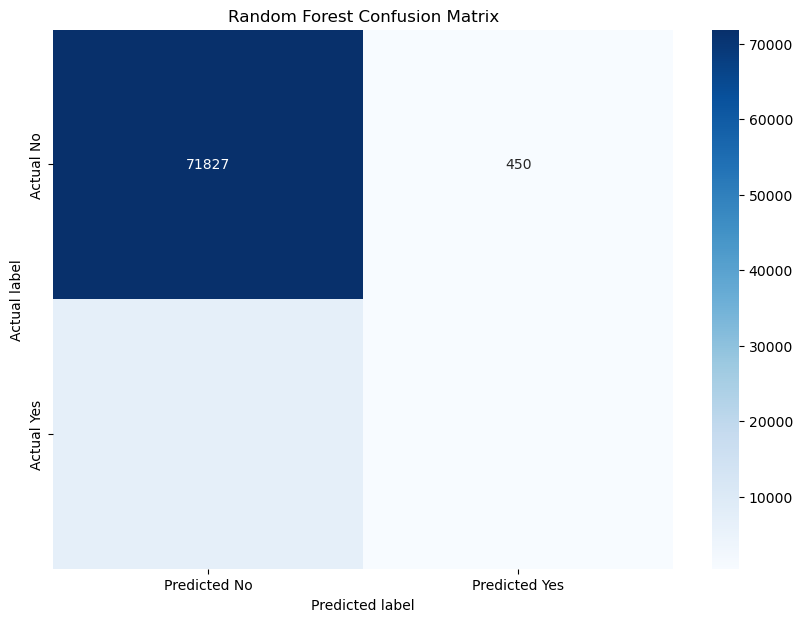

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Reduce the number of estimators to speed up training
# Use n_jobs=-1 to use all available CPU cores
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_pipeline.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_predictions))

rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

This code creates and trains a Random Forest classifier to predict outcomes based on a set of features and evaluates the model's performance on a test dataset. It performs the following steps:

1. **Import Libraries**: Includes necessary tools from sklearn for building a Random Forest model and Pipelines, as well as seaborn and matplotlib for visualization.

2. **Create a Pipeline**: It constructs a machine learning pipeline that applies preprocessing (contained in the variable `preprocessor`, not shown in the snippet) and then fits a Random Forest classifier. The classifier is configured with 50 trees (`n_estimators=50`) to balance between performance and computational efficiency, a fixed `random_state` for reproducibility of results, and `n_jobs=-1` to utilize all available CPU cores for faster training.

3. **Train the Model**: Uses the pipeline to fit the model on a training dataset (`X_train`, `y_train`).

4. **Model Prediction and Evaluation**: 
   - It makes predictions on the test dataset (`X_test`) and prints a classification report that includes metrics such as precision, recall, and F1-score, providing insights into the model's performance across different classes (e.g., 'Yes', 'No').
   - Uses the `confusion_matrix` function to compute the confusion matrix between the true labels (`y_test`) and predictions (`rf_predictions`), facilitating the evaluation of how well the model predicts each class.

5. **Visualize Confusion Matrix**: Generates a heatmap visualization of the confusion matrix using seaborn (with `sns.heatmap`) to visually represent the model's performance. The heatmap shows the number of true positives, true negatives, false positives, and false negatives, with labels for actual and predicted classes. The visualization is enhanced with a specific figure size, color map ('Blues'), and custom axis labels to improve readability.

Overall, the purpose of this code is to leverage a Random Forest Classifier for predictive analysis, assess the model's accuracy and error types through various performance metrics, and visually represent the results to offer clear insights into the model's behavior.

In [7]:
# Assuming model predictions and true labels are stored in variables 'rf_predictions' and 'y_test' respectively
from sklearn.metrics import accuracy_score, confusion_matrix

# Substitute 'y_true' with 'y_test' to match common variable names for true labels
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Classification Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, rf_predictions)
TP = cm[1, 1]  # True Positives: Y predicted as Y
TN = cm[0, 0]  # True Negatives: N predicted as N
FP = cm[0, 1]  # False Positives: N predicted as Y
FN = cm[1, 0]  # False Negatives: Y predicted as N

TPR = TP / (TP + FN)  # True Positive Rate = TP / (TP + FN)
TNR = TN / (TN + FP)  # True Negative Rate = TN / (TN + FP)
FNR = FN / (FN + TP)  # False Negative Rate = FN / (TP + FN)
FPR = FP / (FP + TN)  # False Positive Rate = FP / (TN + FP)

print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")

Classification Accuracy: 0.91
True Positive Rate (TPR): 0.06
True Negative Rate (TNR): 0.99
False Negative Rate (FNR): 0.94
False Positive Rate (FPR): 0.01


## Decision Tree

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision tree classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TP = cm[1, 1]  # True Positives: Y predicted as Y
TN = cm[0, 0]  # True Negatives: N predicted as N
FP = cm[0, 1]  # False Positives: N predicted as Y
FN = cm[1, 0]  # False Negatives: Y predicted as N

TPR = TP / (TP + FN)  # True Positive Rate = TP / (TP + FN)
TNR = TN / (TN + FP)  # True Negative Rate = TN / (TN + FP)
FNR = FN / (FN + TP)  # False Negative Rate = FN / (TP + FN)
FPR = FP / (FP + TN)  # False Positive Rate = FP / (TN + FP)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"True Positive Rate (Sensitivity): {TPR:.2f}")
print(f"True Negative Rate (Specificity): {TNR:.2f}")
print(f"False Positive Rate: {FPR:.2f}")
print(f"False Negative Rate: {FNR:.2f}")

Confusion Matrix:
[[66364  5913]
 [ 5627  1741]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92     72277
         Yes       0.23      0.24      0.23      7368

    accuracy                           0.86     79645
   macro avg       0.57      0.58      0.58     79645
weighted avg       0.86      0.86      0.86     79645


Accuracy: 0.86
True Positive Rate (Sensitivity): 0.24
True Negative Rate (Specificity): 0.92
False Positive Rate: 0.08
False Negative Rate: 0.76


This code defines, trains, and evaluates a Decision Tree Classifier using a scikit-learn pipeline. The steps involved are as follows:

1. **Initialization of the Pipeline**: It sets up a pipeline with two stages: preprocessing (with an object named `preprocessor`), and a decision tree classifier with a specified `random_state` for reproducibility.

2. **Model Training**: The pipeline, including both the preprocessing and the decision tree classifier, is trained on the training dataset `X_train` with the corresponding labels `y_train`.

3. **Making Predictions**: Once trained, the model is used to predict outcomes on the test dataset `X_test`.

4. **Model Evaluation**: 
   - A confusion matrix (`cm`) is computed for the predictions against the true labels `y_test`, from which True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) are extracted.
   - Several performance metrics are calculated including:
     - **True Positive Rate (Sensitivity)**: The proportion of positive cases correctly identified.
     - **True Negative Rate (Specificity)**: The proportion of negative cases accurately identified.
     - **False Positive Rate**: The proportion of negative cases incorrectly classified as positive.
     - **False Negative Rate**: The proportion of positive cases incorrectly classified as negative.
   - The accuracy of the model is calculated and printed alongside the confusion matrix and a classification report that includes precision, recall, and F1-scores for each class together with overall accuracy and weighted averages of these metrics.

Overall, the code demonstrates the steps to prepare, apply, and assess the performance of a decision tree model for classification tasks using a dataset split into training and testing sets.

In [13]:
# Considering the primary issue is related to fitting the model with categorical string data,
# the provided code lacks the preprocessing step to encode or handle categorical features before fitting the model.
# An appropriate fix would incorporate preprocessing to convert categorical data to numerical format.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming X_train, y_train, X_test, y_test are defined and ready to use
# and assuming the 'State' column or similar categorical columns are causing the issue

# Example of preprocessing to encode categorical variables first
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

pipeline.fit(X_train, y_train)

# Preparing feature names correctly for visualization
active_features = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names(categorical_features)
all_features = list(active_features) + list(X_train.select_dtypes(exclude=['object', 'category']).columns)

f = plt.figure(figsize=(24,12))
plot_tree(pipeline.named_steps['classifier'], filled=True, rounded=True, feature_names=all_features, class_names=["No Cardiovascular Disease","Have Cardiovascular Disease"], fontsize=10)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0], xticklabels=["No Cardiovascular Disease", "Have Cardiovascular Disease"], yticklabels=["Actual No Cardiovascular Disease", "Actual Have Cardiovascular Disease"])
axes[0].set_title('Train Set (Max Depth 3)')
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1], xticklabels=["No Cardiovascular Disease", "Have Cardiovascular Disease"], yticklabels=["Actual No Cardiovascular Disease", "Actual Have Cardiovascular Disease"])
axes[1].set_title('Test Set (Max Depth 3)')

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

**Pipeline Creation**: The code creates a pipeline combining the preprocessing step (categorical data encoding) with a Decision Tree Classifier. The classifier is configured with a maximum depth of 3 to prevent overfitting, and a `random_state` for reproducible results.


**Visualization and Evaluation**:
   - A decision tree visualization displays how the model makes decisions based on the processed features, including both the originally numeric and newly encoded categorical features.
   - The confusion matrix for both the training and test sets is visualized using heatmaps to show the distribution of true and predicted labels, offering insight into the model's performance, including its accuracy and possible biases towards certain classes.